# 異常検知ハンズオン

In [226]:
import pandas as pd
import numpy as np
import os
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 使用データ

今回使用するデータは、2013年9月のヨーロッパクレジットカードトランザクションの匿名化されたデータである。
このデータは、Worldline社とブリュッセル自由大学の機械学習グループの共同研究で集められたものであり、以下のKaggleから入手できる。

https://www.kaggle.com/mlg-ulb/creditcardfraud

In [140]:
current_path = current_path = os.getcwd()
df_main = pd.read_csv(current_path+"/./data/creditcard.csv", nrows=None)

## 簡単なデータの確認

列名

- Time：タイムスタンプ
- V1〜28：数値特徴量
- Amount：金額
- Class：不正データかどうか（0or1）

### データの全貌

In [141]:
# 頭20件を確認
df_main.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [142]:
print("データの列名と型")
print(pd.DataFrame(df_main.dtypes, index=df_main.columns))
print("全データ数：", df_main.shape[0])
print("不正であるデータ数：", df_main["Class"].sum())

データの列名と型
              0
Time    float64
V1      float64
V2      float64
V3      float64
V4      float64
V5      float64
V6      float64
V7      float64
V8      float64
V9      float64
V10     float64
V11     float64
V12     float64
V13     float64
V14     float64
V15     float64
V16     float64
V17     float64
V18     float64
V19     float64
V20     float64
V21     float64
V22     float64
V23     float64
V24     float64
V25     float64
V26     float64
V27     float64
V28     float64
Amount  float64
Class     int64
全データ数： 284807
不正であるデータ数： 492


### 基本統計量や欠損値

In [143]:
df_main.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [144]:
print("欠損数", np.isnan(df_main).sum())

欠損数 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [145]:
# 他に気になることがあれば...


## 今回のタスク

使用するデータの内、「Class（不正データかどうか）」以外の情報を用いて、異常（不正）かどうかを見分ける

今回は、2.4節の「高度な特徴抽出による異常検知」を試す。

簡単なステップ（詳細は2.4節を参照）
- トランザクションデータを２分割する。前半データは異常度算出用のモデルを学習するために使用し、後半データはモデルの評価を行うために使用
- 前半データを用いて、モデル学習、異常度の算出、異常度閾値の設定
- 後半データに対して、異常度を算出して異常度閾値をもとに異常値を判断
- 「Class」を用いて、実際に異常（不正）だったかどうか確認

In [146]:
X_train, X_valid = train_test_split(df_main, train_size=0.8)
y_train, y_valid = X_train["Class"], X_valid["Class"]
X_train, X_valid = X_train.drop(["Time", "Class"], axis=1), X_valid.drop(["Time", "Class"], axis=1)

### 高度な特徴抽出による異常検知（k平均法）（一例）

In [222]:
# 使用するモデルの設定
n_clusters = 1
model = KMeans(n_clusters=n_clusters, random_state=2022)
# モデル学習
model.fit(X_train)

KMeans(n_clusters=10, random_state=2022)

In [223]:
# 異常度の算出（今回はユークリッド距離を使用）
def calc_norm(x, y):
    return np.linalg.norm(x - y)

# 必要な情報を取得
center_points = model.cluster_centers_
label_list = model.labels_

# 計算した異常度を保存する変数
anomaly_values = np.zeros(len(X_train))

# クラスターごとに異常度を計算
for label in range(n_clusters):
    ix = label_list == label
    if ix.any():
        anomaly_values[ix] = X_train.loc[ix].apply(lambda x: calc_norm(x, center_points[label]), axis=1)
    else:
        pass


In [224]:
# 異常度閾値の設定
anomaly_threshold = np.quantile(anomaly_values, q=[0.95])[0]
print(anomaly_threshold)

72.55366458294023


/var/folders/3n/yms_hk792lj3t3t4jcwhfdrc0000gn/T/ipykernel_33332/4234968604.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([0,len(y_train)],[anomaly_threshold, anomaly_threshold], 'k-', color = "r", ls = "dashed")
/var/folders/3n/yms_hk792lj3t3t4jcwhfdrc0000gn/T/ipykernel_33332/4234968604.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,len(y_train)],[anomaly_threshold, anomaly_threshold], 'k-', color = "r", ls = "dashed")


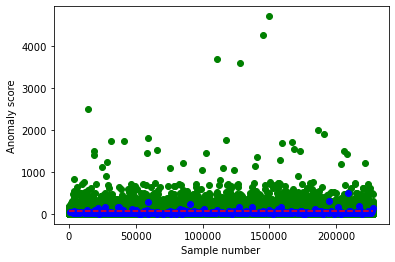

0    227461
1       384
Name: Class, dtype: int64
0    11355
1       38
Name: Class, dtype: int64


In [225]:
# 結果の描画
plt.plot(np.arange(len(y_train))[y_train==0], anomaly_values[y_train==0], "o", color = "g")
plt.plot(np.arange(len(y_train))[y_train==1], anomaly_values[y_train==1], "o", color = "b")
plt.plot([0,len(y_train)],[anomaly_threshold, anomaly_threshold], 'k-', color = "r", ls = "dashed")
plt.xlabel("Sample number")
plt.ylabel("Anomaly score")
plt.show()
print(y_train.value_counts())
print(y_train[anomaly_values>anomaly_threshold].value_counts())

In [197]:
# 新しいデータの異常度を計算
valid_label_list = model.predict(X_valid)
valid_anomaly_values = np.zeros(len(X_valid))

# クラスターごとに異常度を計算
for label in range(n_clusters):
    ix = valid_label_list == label
    if ix.any():
        valid_anomaly_values[ix] = X_valid.loc[ix].apply(lambda x: calc_norm(x, center_points[label]), axis=1)
    else:
        pass


/var/folders/3n/yms_hk792lj3t3t4jcwhfdrc0000gn/T/ipykernel_33332/1110927297.py:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([0,len(y_valid)],[anomaly_threshold, anomaly_threshold], 'k-', color = "r", ls = "dashed")
/var/folders/3n/yms_hk792lj3t3t4jcwhfdrc0000gn/T/ipykernel_33332/1110927297.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,len(y_valid)],[anomaly_threshold, anomaly_threshold], 'k-', color = "r", ls = "dashed")


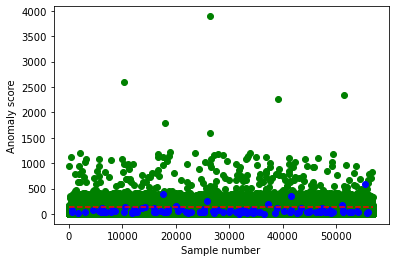

0    56854
1      108
Name: Class, dtype: int64
0    2862
1       7
Name: Class, dtype: int64


In [221]:
# 結果の描画
plt.plot(np.arange(len(y_valid))[y_valid==0], valid_anomaly_values[y_valid==0], "o", color = "g")
plt.plot(np.arange(len(y_valid))[y_valid==1], valid_anomaly_values[y_valid==1], "o", color = "b")
plt.plot([0,len(y_valid)],[anomaly_threshold, anomaly_threshold], 'k-', color = "r", ls = "dashed")
plt.xlabel("Sample number")
plt.ylabel("Anomaly score")
plt.show()
print(y_valid.value_counts())
print(y_valid[valid_anomaly_values>anomaly_threshold].value_counts())

auc: 0.7306684828846859
false_alarm_rate:  [0.00000000e+00 1.75889119e-05 2.39209203e-03 ... 9.99155732e-01
 9.99190910e-01 1.00000000e+00]
recall:  [0. 0. 0. ... 1. 1. 1.]
thresholds:  [3.89320843e+03 3.89220843e+03 6.32562554e+02 ... 2.98417623e+00
 2.98217644e+00 2.50018488e+00]


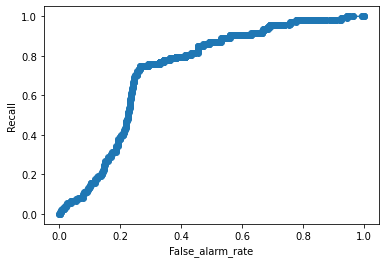

In [230]:
# 評価指標（AUC）
#異常度の計算結果
false_alarm_rate, recall, thresholds = metrics.roc_curve(y_valid, valid_anomaly_values)
auc = metrics.auc(false_alarm_rate, recall)
print("auc:", auc)
print("false_alarm_rate: ", false_alarm_rate)
print("recall: ", recall)
print("thresholds: ", thresholds)

plt.plot(false_alarm_rate, recall, marker="o")
plt.xlabel("False_alarm_rate")
plt.ylabel("Recall")
plt.show()